In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the dataset
data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

# Display the first few rows of the dataset
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [23]:
# copy the data
df = data.copy()

In [24]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [25]:
# Check the shape of the dataset
print("The shape of the dataset is:", df.shape)

The shape of the dataset is: (3333, 21)


In [26]:
# Check the column names
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [27]:
# Get basic statistics of the dataset
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [28]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [29]:
# Check for any duplicate rows
print("The number of duplicate rows:", df.duplicated().sum())

The number of duplicate rows: 0


In [30]:
# Check the data types of each column
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


The data is clean and ready for analysis

### Distribution of Churn
- Let's see how many customers churned and how many stayed.

In [31]:
# Count of churned vs non-churned customers
churn_counts = df['churn'].value_counts()
print("Churn counts:\n", churn_counts)

Churn counts:
 False    2850
True      483
Name: churn, dtype: int64


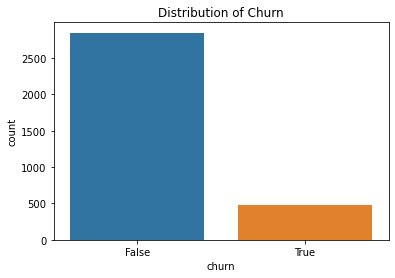

In [32]:
# Plot the distribution of churn
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn');

### Correlation Matrix
- Let's check the correlation between numerical features.

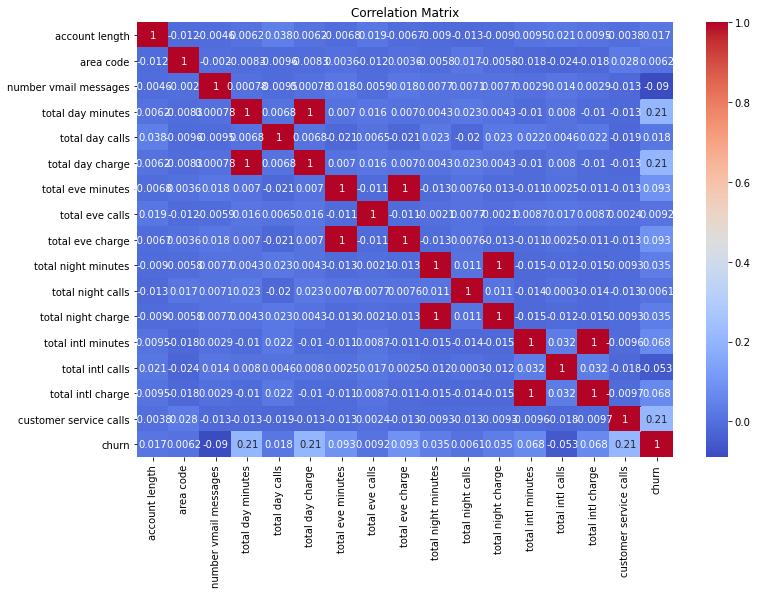

In [33]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Distribution of Numerical Features
- Let's visualize the distribution of some numerical features.

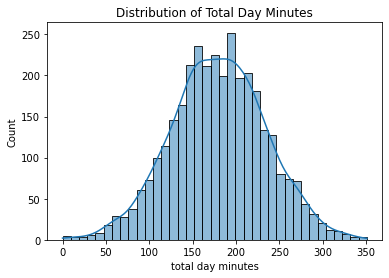

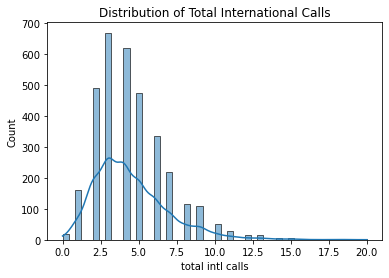

In [34]:
# Plot the distribution of 'total day minutes'
sns.histplot(df['total day minutes'], kde=True)
plt.title('Distribution of Total Day Minutes')
plt.show()

# Plot the distribution of 'total intl calls'
sns.histplot(df['total intl calls'], kde=True)
plt.title('Distribution of Total International Calls')
plt.show()

### Churn by Categorical Features
- Let's see how churn varies with categorical features like 'international plan' and 'voice mail plan'.

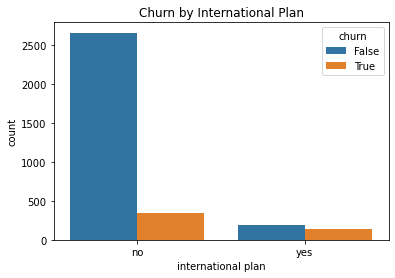

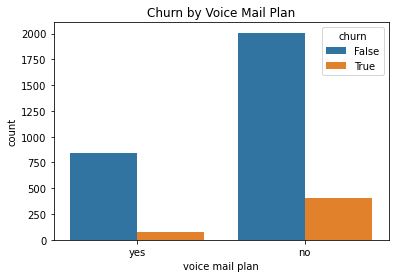

In [35]:
# Churn by international plan
sns.countplot(x='international plan', hue='churn', data=df)
plt.title('Churn by International Plan')
plt.show()

# Churn by voice mail plan
sns.countplot(x='voice mail plan', hue='churn', data=df)
plt.title('Churn by Voice Mail Plan')
plt.show()

#### Feature Engineering

In [36]:
# Create a new feature 'total minutes' by summing day, evening, and night minutes
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']

# Create a new feature 'total calls' by summing day, evening, and night calls
df['total calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls']

# Create a new feature 'total charges' by summing day, evening, and night charges
df['total charges'] = df['total day charge'] + df['total eve charge'] + df['total night charge']

# Display the first few rows to verify the new feature
df[['total day charge', 'total eve charge', 'total night charge', 'total charges']].head()

,total day charge,total eve charge,total night charge,total charges
0,45.07,16.78,11.01,72.86
1,27.47,16.62,11.45,55.54
2,41.38,10.30,7.32,59.00
3,50.90,5.26,8.86,65.02
4,28.34,12.61,8.41,49.36


In [37]:
# Save the cleaned dataset
df.to_csv('cleaned_telecom_data.csv', index=False)